# Groceries Data Analysis

## Content
<p>1. Introduction</p>
<p>2. Objective</p>
<p>3. Getting to Know Data & Variables</p>
<p>4. Data Preparation</p>
<p>5. Data Analysis</p>
<p>6. Modelling & Assessment</p>
<p>7. Conclusion</p>
<p>8. Reference</p>

## 1. Introduction
<p>A grocery store sells various products to fulfill different customers' demands. When Sales and Planning teams make orders for the store, it is important for them to know the best selling products, corresponding volume and purchase time to make balance between keeping safety stock of products and minimising operation cost.</p>

## 2. Objective
<p>To find out the best selling products and corresponding purchase patterns for stock level planning.</p>

## 3. Getting to Know Data & Variables

### 3.1 Data Import
<p>Data in csv format is imported.</p>

In [1]:
#Import Data
data<-read.csv("Groceries_dataset.csv")

### 3.2 Data Preview

In [2]:
#Data preview
head(data)

,Member_number,Date,itemDescription
,<int>,<chr>,<chr>
1,1808,21-07-2015,tropical fruit
2,2552,05-01-2015,whole milk
3,2300,19-09-2015,pip fruit
4,1187,12-12-2015,other vegetables
5,3037,01-02-2015,whole milk
6,4941,14-02-2015,rolls/buns


<br></br>
<p>From the preview, columns needed to be renamed and looks tidier.</p>
<br></br>

In [3]:
#Tidy up of columns' names
names(data)[1]<-"Member_Number"
names(data)[3]<-"Item_Description"
head(data)
str(data)

,Member_Number,Date,Item_Description
,<int>,<chr>,<chr>
1,1808,21-07-2015,tropical fruit
2,2552,05-01-2015,whole milk
3,2300,19-09-2015,pip fruit
4,1187,12-12-2015,other vegetables
5,3037,01-02-2015,whole milk
6,4941,14-02-2015,rolls/buns


'data.frame':	38765 obs. of  3 variables:
 $ Member_Number   : int  1808 2552 2300 1187 3037 4941 4501 3803 2762 4119 ...
 $ Date            : chr  "21-07-2015" "05-01-2015" "19-09-2015" "12-12-2015" ...
 $ Item_Description: chr  "tropical fruit" "whole milk" "pip fruit" "other vegetables" ...


<br></br>
<p>There are 38,765 records with 3 variables. Below table shows summary of the variales' description and data type.</p>
<br></br>

|   **Variable**   |                           **Description**                    |  **Data Type** |
|:-----------------:|:--------------------------------------------------------------|:----------------|
|Member_Number      |ID No. of customers.                                           |Nominal Number   |
|Date               |Purchase date.                                                 |Character        | 
|Item_Description   |Purchase item.                                                 |Character        | 

<br></br>
<p>There are 2 variables for character and 1 variables for number.</p>
<br></br>

## 4. Data Preparation
### 4.1 Missing Values Detection

In [4]:
#View statistical summary
summary(data)

 Member_Number      Date           Item_Description  
 Min.   :1000   Length:38765       Length:38765      
 1st Qu.:2002   Class :character   Class :character  
 Median :3005   Mode  :character   Mode  :character  
 Mean   :3004                                        
 3rd Qu.:4007                                        
 Max.   :5000                                        

<br></br>
<p>No missing values are found as no NA values are displayed from statistical summary.</p>
<br></br>

### 4.2 Date Type Conversion
<p>To prepare for time series data analysis, change data type of Date from character to date and format to yyyy-mm-dd.</p>

In [5]:
#Installation of packages
install.packages("lubridate")
library(lubridate)

#Date type conversion of Date
data$Date<-parse_date_time2(data$Date, orders = "dmY")

#Revised data type of Date
class(data$Date)

#View of data
head(data)

Installing package into 'C:/Users/cally/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cally\AppData\Local\Temp\RtmpW84JTC\downloaded_packages



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




[1] "POSIXct" "POSIXt"

,Member_Number,Date,Item_Description
,<int>,<dttm>,<chr>
1,1808,2015-07-21,tropical fruit
2,2552,2015-01-05,whole milk
3,2300,2015-09-19,pip fruit
4,1187,2015-12-12,other vegetables
5,3037,2015-02-01,whole milk
6,4941,2015-02-14,rolls/buns


## 5. Data Analysis

### 5.1 Top 10 Best Selling Products

In [6]:
#Installion of packages
install.packages("dplyr")
library(dplyr)

#Add month and weekday of purchase date
data$Month<-month(as.POSIXlt(data$Date,format = "%Y-%M-%d"), label = TRUE)
data$Weekday<-wday(as.POSIXlt(data$Date,format = "%Y-%M-%d"), label = TRUE)
head(data)

Installing package into 'C:/Users/cally/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cally\AppData\Local\Temp\RtmpW84JTC\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,Member_Number,Date,Item_Description,Month,Weekday
,<int>,<dttm>,<chr>,<ord>,<ord>
1,1808,2015-07-21,tropical fruit,Jul,Tue
2,2552,2015-01-05,whole milk,Jan,Mon
3,2300,2015-09-19,pip fruit,Sep,Sat
4,1187,2015-12-12,other vegetables,Dec,Sat
5,3037,2015-02-01,whole milk,Feb,Sun
6,4941,2015-02-14,rolls/buns,Feb,Sat


<br></br>
<p>To get more information of purchase pattern, variable of "Month" and "Weekday" are added.</p>
<br></br>

Selecting by Count



Item_Description,Count
<chr>,<int>
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


Installing package into 'C:/Users/cally/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cally\AppData\Local\Temp\RtmpW84JTC\downloaded_packages


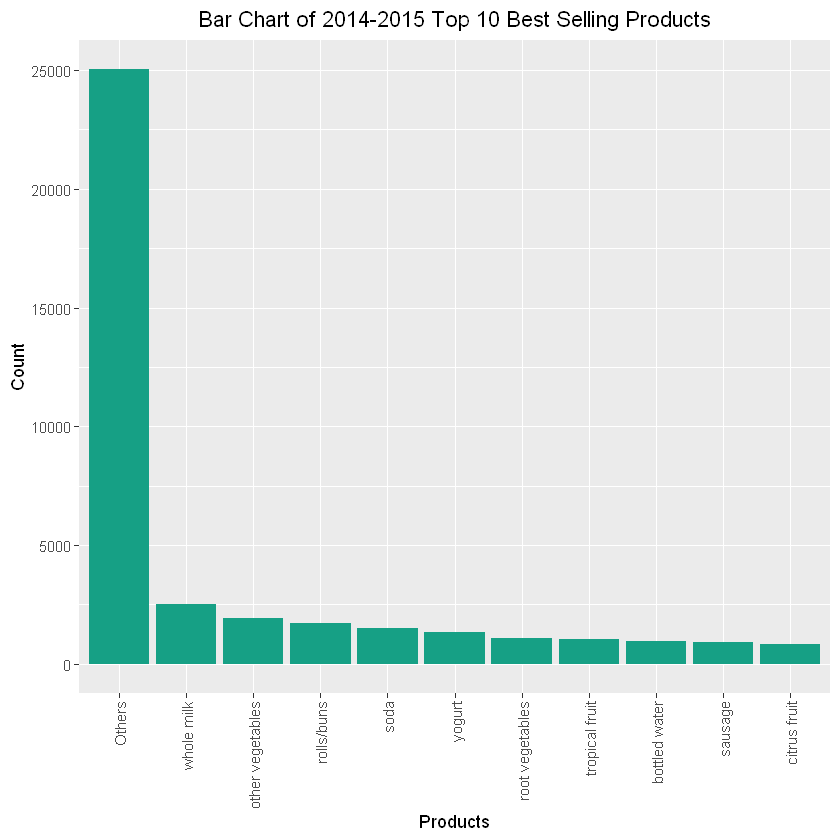

In [7]:
#Creation of frequency table
ft1<- data %>% 
    group_by(Item_Description) %>% 
    summarise(Count = n()) %>%
    arrange(desc(Count))

#Creation of top 10 table
ft2<-rbind(top_n(ft1,10),slice(ft1,11:n()) %>% 
    summarise(Item_Description = "Others", Count = sum(Count)))
ft2

#Installation of packages
install.packages("ggplot2")
library(ggplot2)

#Bar chart of 2014-2015 top 10 best selling products
p1<-ggplot(ft2, aes(x = reorder(Item_Description, -Count) , y = Count)) + 
        geom_bar(fill = "#16A085", stat = "identity") +
        ggtitle("Bar Chart of 2014-2015 Top 10 Best Selling Products") +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(x = "Products", y = "Count")+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p1 

<br></br>
<p>From the bar chart, it shows that top 10 best selling products in 2014 to 2015. The most popular product is whole milk, second is other vegetabables and third is rolls/buns. So, they should have higher stock level to fulfill customers' demands and prevent out-of-stock.</p>
<p>Besides, more than half of top 10 products are perishable food that are needed to be stored and transported under climate-controlled condition. As the operation cost with climate-controlled condition is higher than normal conditiona, the stock level should be considered carefully.</p>
<br></br>

Selecting by Count

Selecting by Count

Selecting by Count

Selecting by Count

Selecting by Count

Selecting by Count

Selecting by Count

Installing package into 'C:/Users/cally/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cally\AppData\Local\Temp\RtmpW84JTC\downloaded_packages



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




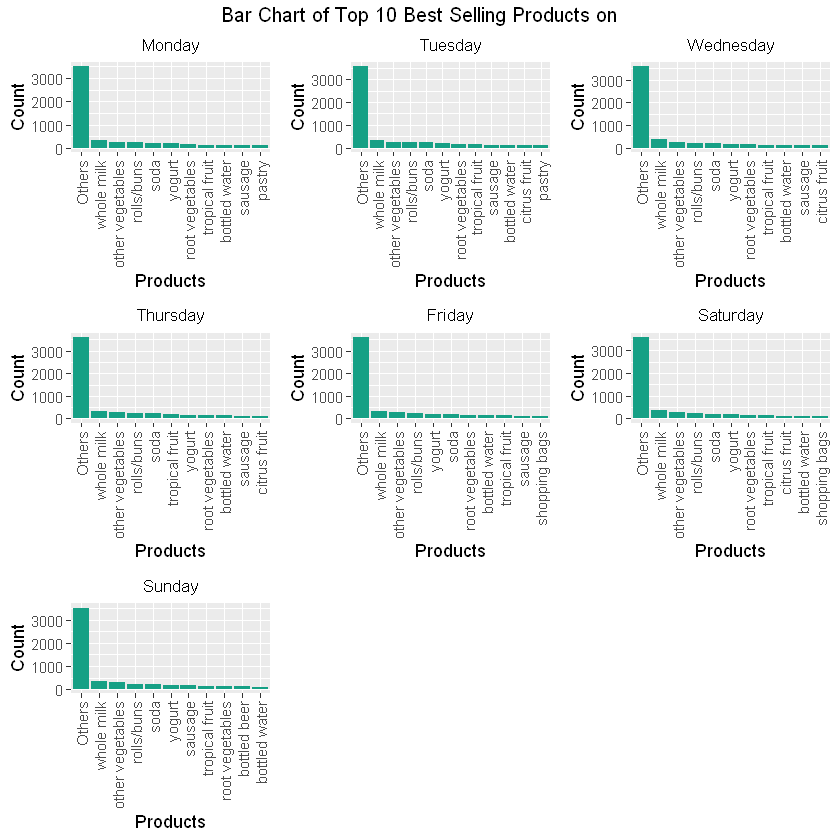

In [8]:
#Creation of frequency table on Mon
ft3<-data %>% 
    filter(Weekday == "Mon") %>%
    group_by(Item_Description) %>% 
    summarise(Count = n()) %>%
    arrange(desc(Count))
#Creation of top 10 table on Mon
ft4<-rbind(top_n(ft3,10),slice(ft3,11:n()) %>% 
    summarise(Item_Description = "Others", Count = sum(Count)))

#Creation of frequency table on Tue
ft5<-data %>% 
    filter(Weekday == "Tue") %>%
    group_by(Item_Description) %>% 
    summarise(Count = n()) %>%
    arrange(desc(Count))
#Creation of top 10 table on Tue
ft6<-rbind(top_n(ft5,10),slice(ft5,11:n()) %>% 
    summarise(Item_Description = "Others", Count = sum(Count)))

#Creation of frequency table on Wed
ft7<-data %>% 
    filter(Weekday == "Wed") %>%
    group_by(Item_Description) %>% 
    summarise(Count = n()) %>%
    arrange(desc(Count))
#Creation of top 10 table on Wed
ft8<-rbind(top_n(ft7,10),slice(ft7,11:n()) %>% 
    summarise(Item_Description = "Others", Count = sum(Count)))

#Creation of frequency table on Thu
ft9<-data %>% 
    filter(Weekday == "Thu") %>%
    group_by(Item_Description) %>% 
    summarise(Count = n()) %>%
    arrange(desc(Count))
#Creation of top 10 table on  Thu
ft10<-rbind(top_n(ft9,10),slice(ft9,11:n()) %>% 
    summarise(Item_Description = "Others", Count = sum(Count)))

#Creation of frequency table on Fri
ft11<-data %>% 
    filter(Weekday == "Fri") %>%
    group_by(Item_Description) %>% 
    summarise(Count = n()) %>%
    arrange(desc(Count))
#Creation of top 10 table on Fri
ft12<-rbind(top_n(ft11,10),slice(ft11,11:n()) %>% 
    summarise(Item_Description = "Others", Count = sum(Count)))

#Creation of frequency table on Sat
ft13<-data %>% 
    filter(Weekday == "Sat") %>%
    group_by(Item_Description) %>% 
    summarise(Count = n()) %>%
    arrange(desc(Count))
#Creation of top 10 table on Sat
ft14<-rbind(top_n(ft13,10),slice(ft13,11:n()) %>% 
    summarise(Item_Description = "Others", Count = sum(Count)))

#Creation of frequency table on Sun
ft15<-data %>% 
    filter(Weekday == "Sun") %>%
    group_by(Item_Description) %>% 
    summarise(Count = n()) %>%
    arrange(desc(Count))
#Creation of top 10 table on Sun
ft16<-rbind(top_n(ft15,10),slice(ft15,11:n()) %>% 
    summarise(Item_Description = "Others", Count = sum(Count)))


#Bar chart of 2014-2015 top 10 best selling products by Weeday
p2<-ggplot(ft4, aes(x = reorder(Item_Description, -Count) , y = Count)) + 
        geom_bar(fill = "#16A085", stat = "identity") +
        ggtitle("Monday") +
        theme(plot.title = element_text(hjust = 0.5, size = 10)) +
        labs(x = "Products", y = "Count")+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p3<-ggplot(ft6, aes(x = reorder(Item_Description, -Count) , y = Count)) + 
        geom_bar(fill = "#16A085", stat = "identity") +
        ggtitle("Tuesday") +
        theme(plot.title = element_text(hjust = 0.5, size = 10)) +
        labs(x = "Products", y = "Count")+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p4<-ggplot(ft8, aes(x = reorder(Item_Description, -Count) , y = Count)) + 
        geom_bar(fill = "#16A085", stat = "identity") +
        ggtitle("Wednesday") +
        theme(plot.title = element_text(hjust = 0.5, size = 10)) +
        labs(x = "Products", y = "Count")+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p5<-ggplot(ft10, aes(x = reorder(Item_Description, -Count) , y = Count)) + 
        geom_bar(fill = "#16A085", stat = "identity") +
        ggtitle("Thursday") +
        theme(plot.title = element_text(hjust = 0.5, size = 10)) +
        labs(x = "Products", y = "Count")+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p6<-ggplot(ft12, aes(x = reorder(Item_Description, -Count) , y = Count)) + 
        geom_bar(fill = "#16A085", stat = "identity") +
        ggtitle("Friday") +
        theme(plot.title = element_text(hjust = 0.5, size = 10)) +
        labs(x = "Products", y = "Count")+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p7<-ggplot(ft14, aes(x = reorder(Item_Description, -Count) , y = Count)) + 
        geom_bar(fill = "#16A085", stat = "identity") +
        ggtitle("Saturday") +
        theme(plot.title = element_text(hjust = 0.5, size = 10)) +
        labs(x = "Products", y = "Count")+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p8<-ggplot(ft16, aes(x = reorder(Item_Description, -Count) , y = Count)) + 
        geom_bar(fill = "#16A085", stat = "identity") +
        ggtitle("Sunday") +
        theme(plot.title = element_text(hjust = 0.5, size = 10)) +
        labs(x = "Products", y = "Count")+
        theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

#Installation of packages
install.packages("gridExtra")
library(gridExtra)

#Mulitple plots on the same page
grid.arrange(p2,p3,p4,p5,p6,p7,p8, nrow = 3, top="Bar Chart of Top 10 Best Selling Products on")

<br></br>
<p>Products are sorted into 7 groups, from Monday to Sunday, to show the purchase pattern by weekdays. Whole milk, other vegetables and rolls/buns are top 3 and they have similar sales in all 7 days. For top 4 to top 10, products rank varies with the weekdays.</p>
<br></br>

## 6. Modelling & Assessment
### 6.1 Objective
<p>To forecast the total stock level and find the association among products.</p>

### 6.2 Analysis

#### 6.2.1 Time Series 

Installing package into 'C:/Users/cally/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'tseries' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cally\AppData\Local\Temp\RtmpW84JTC\downloaded_packages


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



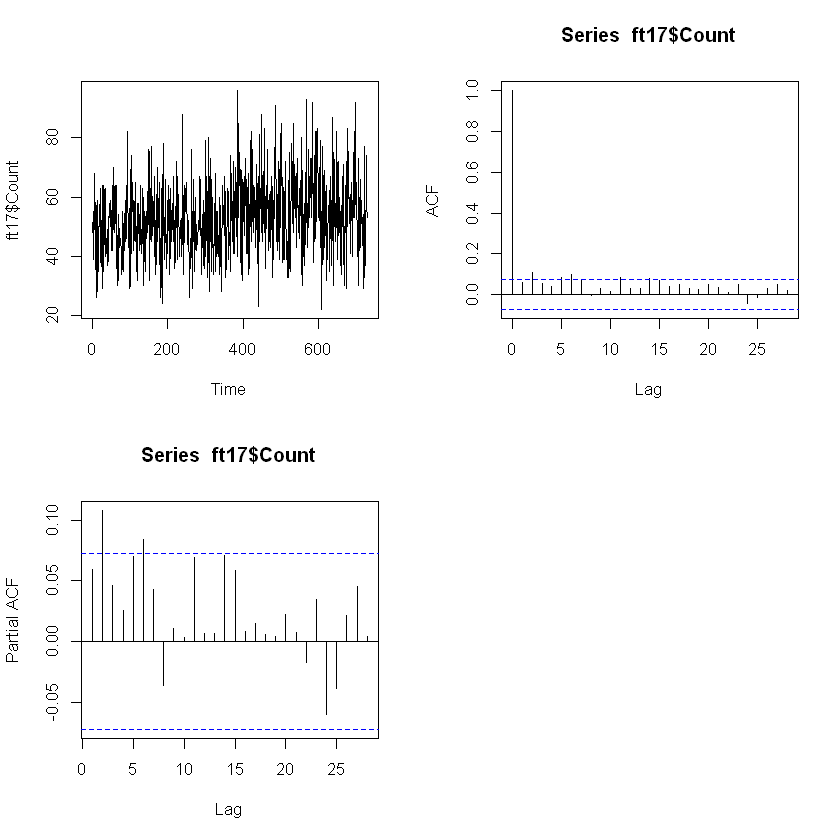

In [9]:
#Install packages
install.packages("tseries")
library(tseries)

#Creation of frequency table
ft17<-data %>% 
    group_by(Date) %>% 
    summarise(Count = n())

#Time Series and ACF 
par(mfrow=c(2,2))
plot.ts(ft17$Count)
acf(ft17$Count)
pacf(ft17$Count)

<br></br>
<p>From the time series plot, data is stationary. Both ACF plot and PACF plot suggest strong correlation at lag 2. It will be input into different models for optimisation, AR(2), MA(2) and ARMA (2,2).</p>
<br></br>

[1] 5786.429

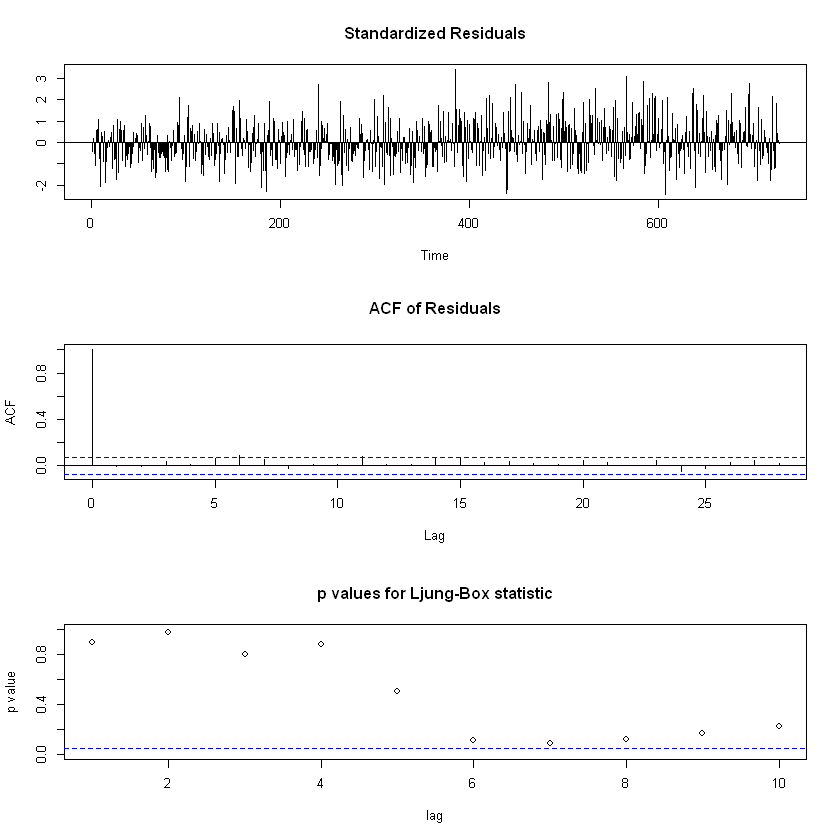

[1] 5787.445

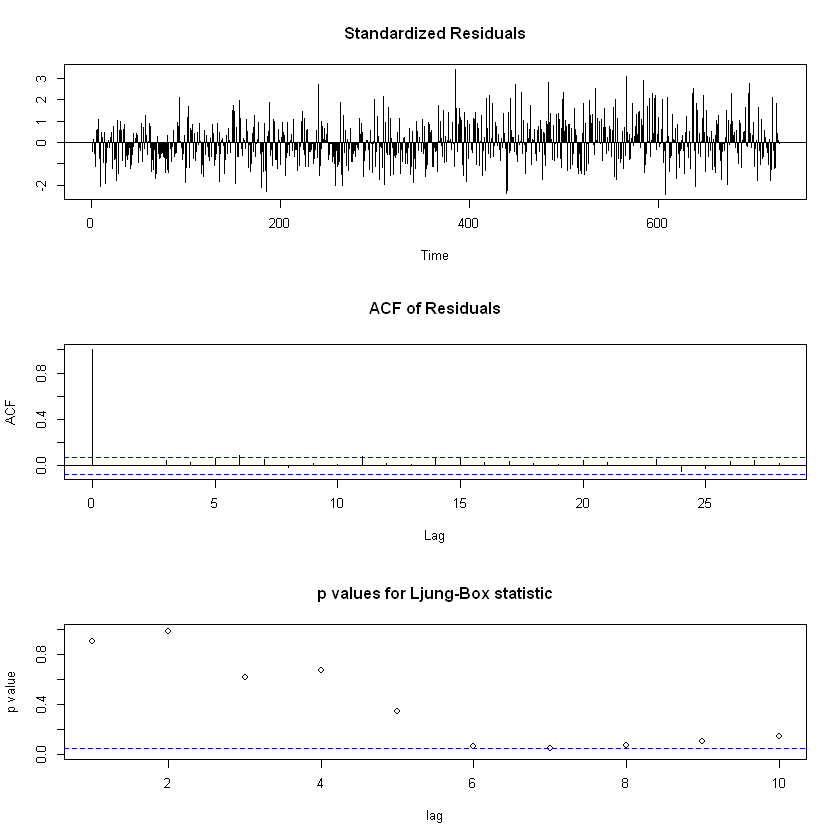

[1] 5776.881

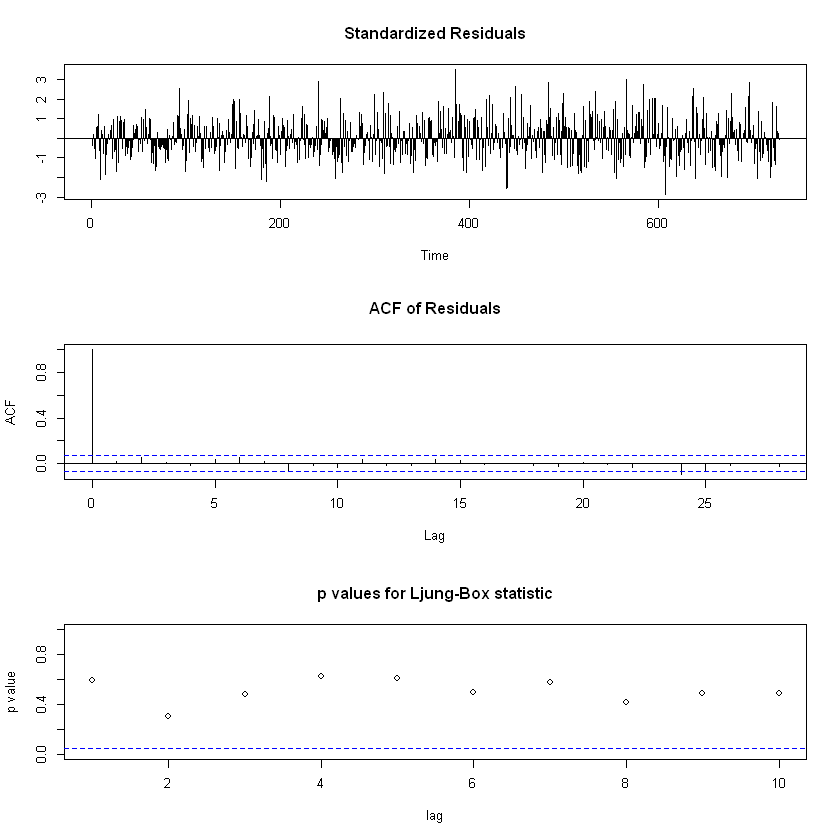

In [10]:
#AR(2)
m1<-arima(ft17$Count,order = c(2,0,0))
tsdiag(m1)
m1$aic

#MA(2)
m2<-arima(ft17$Count,order = c(0,0,2))
tsdiag(m2)
m2$aic

#ARMA(2,2)
m3<-arima(ft17$Count,order = c(2,0,2))
tsdiag(m3)
m3$aic

<br></br>
<p>By trial and error, ARMA(2,2) is selected as it has the smallest AIC value.</p>
<br></br>

A Time Series:
[1] 51.99313 49.01014 50.55441 51.78607 49.39274 50.40184 51.58877

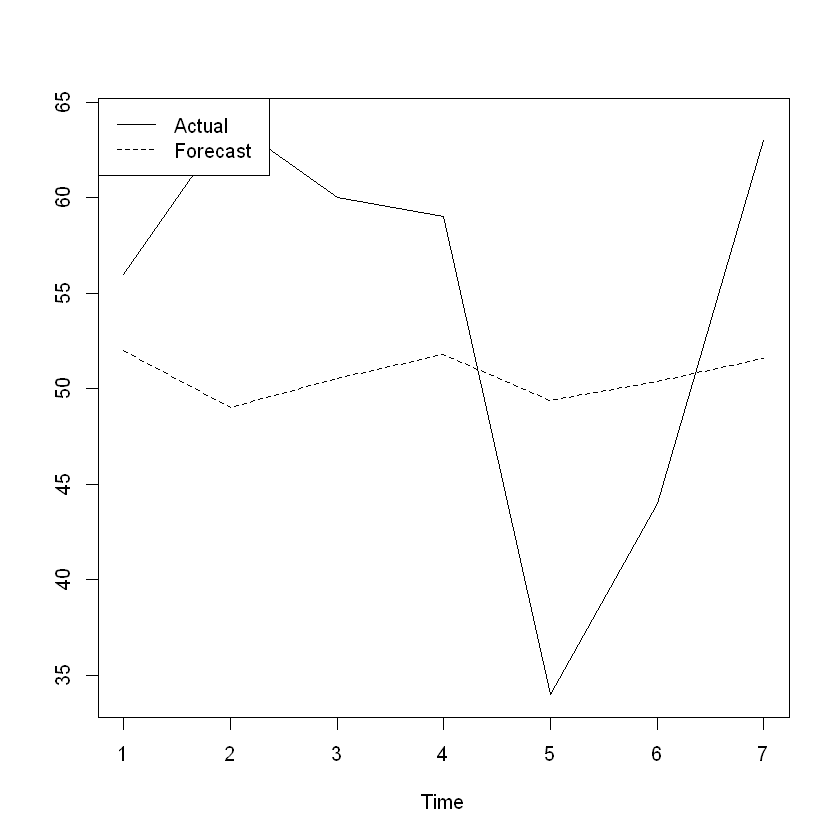

In [66]:
#Finalised model for forecast
m4<-arima(ft17$Count[1:200],order = c(2,1,3))
tfore<-predict(m4,n.ahead = 7)

#Time series plot for comparison between actual & forecast 
ts.plot(as.ts(ft17$Count[201:207]),as.ts(tfore$pred[1:7]), lty = c(1:2))
leg.names = c("Actual", "Forecast")
legend("topleft", leg.names, lty = c(1:2))

#Forecast for next 7 days total stock level
m5<-arima(ft17$Count,order = c(3,2,1))
pred<-predict(m4, n.ahead = 7)
pred$pred

<br></br>
<p>After day 1, the difference between acutal and forecast figures vary.</p>
<br></br>

#### 6.2.2 Association Rule

In [80]:
#List products grouped by same customer on same date
ft18<-data %>% 
    group_by(Member_Number, Date) %>%
    mutate(Items = paste0(Item_Description, collapse = ",")) %>%
    arrange(desc(Member_Number)) %>%
    select(c(0,1,2,6)) %>%
    distinct()
head(ft18)

ft19<-ft18[,3]
head(ft19)

#Export to csv file
write.csv(ft19, "ItemsList.csv", quote = FALSE, row.names = TRUE)

#Install package
install.packages("arules")
library(arules)

#Convert csv file to Market Basket
trx<-read.transactions(file = "ItemsList.csv", rm.duplicates = TRUE, format = "basket",sep = ",",cols = 1)

#Assoication rules
mba<-apriori(trx, parameter = list(support = 0.001, conf = 0.1, target = "rules"))
mba<-sort(mba, by='confidence', decreasing = TRUE)
summary(mba)

Member_Number,Date,Items
<int>,<dttm>,<chr>
5000,2015-02-10,"soda,root vegetables,semi-finished bread"
5000,2014-11-16,"bottled beer,other vegetables"
5000,2014-03-09,"fruit/vegetable juice,onions"
4999,2015-12-26,"bottled water,herbs"
4999,2015-05-16,"butter milk,whipped/sour cream"
4999,2015-01-24,"tropical fruit,berries,other vegetables,yogurt,kitchen towels,napkins"


Items
<chr>
"soda,root vegetables,semi-finished bread"
"bottled beer,other vegetables"
"fruit/vegetable juice,onions"
"bottled water,herbs"
"butter milk,whipped/sour cream"
"tropical fruit,berries,other vegetables,yogurt,kitchen towels,napkins"


Warning message:
"package 'arules' is in use and will not be installed"


distribution of transactions with duplicates:
items
  1   2   3   4 
662  39   5   1 
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[168 item(s), 14964 transaction(s)] done [0.00s].
sorting and recoding items ... [149 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [134 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 134 rules

rule length distribution (lhs + rhs):sizes
  1   2   3 
  3 114  17 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.104   2.000   3.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001002   Min.   :0.1000   Min.   :0.005346   Min.   :0.6458  
 1st Qu.:0.001337   1st Qu.:0.1100   1st Qu.:0.010492   1st Qu.:0.8097  
 Median :0.001938   Median :0.1218   Median :0.016573   Median :0.8848  
 Mean   :0.005778   Mean   :0.1258   Mean   :0.045600   Mean   :0.9477  
 3rd Qu.:0.003909   3rd Qu.:0.1348   3rd Qu.:0.033681   3rd Qu.:1.0267  
 Max.   :0.157912   Max.   :0.2558   Max.   :1.000000   Max.   :2.1831  
     count        
 Min.   :  15.00  
 1st Qu.:  20.00  
 Median :  29.00  
 Mean   :  86.46  
 3rd Qu.:  58.50  
 Max.   :2363.00  

mining info:
 data ntransactions support confidence
  trx         14964   0.001        0.1

     lhs                      rhs          support     confidence coverage   
[1]  {sausage,yogurt}      => {whole milk} 0.001470195 0.2558140  0.005747126
[2]  {rolls/buns,sausage}  => {whole milk} 0.001136060 0.2125000  0.005346164
[3]  {sausage,soda}        => {whole milk} 0.001069233 0.1797753  0.005947608
[4]  {semi-finished bread} => {whole milk} 0.001670676 0.1760563  0.009489441
[5]  {rolls/buns,yogurt}   => {whole milk} 0.001336541 0.1709402  0.007818765
[6]  {sausage,whole milk}  => {yogurt}     0.001470195 0.1641791  0.008954825
[7]  {detergent}           => {whole milk} 0.001403368 0.1627907  0.008620690
[8]  {ham}                 => {whole milk} 0.002739909 0.1601562  0.017107725
[9]  {}                    => {whole milk} 0.157912323 0.1579123  1.000000000
[10] {bottled beer}        => {whole milk} 0.007150495 0.1578171  0.045308741
     lift     count
[1]  1.619975   22 
[2]  1.345683   17 
[3]  1.138450   16 
[4]  1.114899   25 
[5]  1.082501   20 
[6]  1.911888   22 
[7

Warning message:
"package 'arulesViz' is in use and will not be installed"


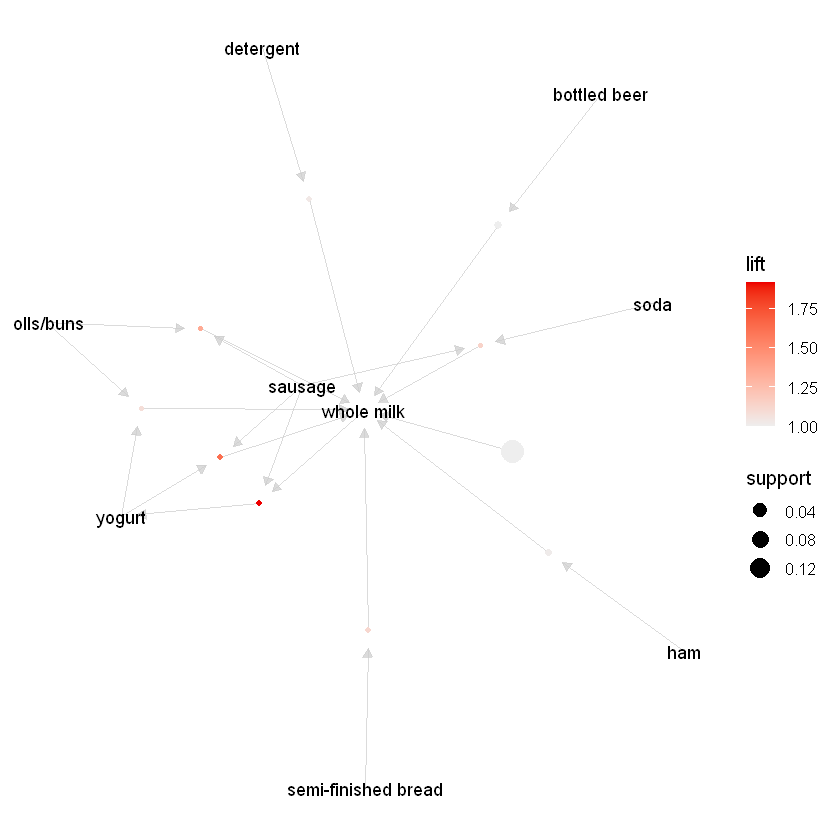

In [81]:
#Display 1 to 10 association rules
inspect(mba[1:10])

#Install packages
install.packages("arulesViz")
library(arulesViz)

#Plot association rules
plot(mba[1:10], method = "graph")

<br></br>
<p>From R's result, top 10 association rules are listed and ploted above.</p>
<br></br>

## 7. Conclusion
<p>In conclusion, the best selling product is whole milk. Top 3 best selling products are whole milk, other vegetables and rolls/buns in each day. For stock planning, the frequency of order time, units and types can be predicted by time series and association rules analysis.</p>

## 8. Reference
### (1) Kaggle, Groceries dataset
<p>Heeral Dedhia (2020). Groceries dataset.</p>
<p>https://www.kaggle.com/heeraldedhia/groceries-dataset</p>